## 🌳 Machine Learning in Agriculture

Importing relavent libraries

In [61]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# # Models from Scikit-Learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
# Load data

train = pd.read_csv('train_yaOffsB.csv',index_col=0)
test = pd.read_csv('test_pFkWwen.csv',index_col=0)
sample = pd.read_csv('sample_submission_O1oDc4H.csv')
train.shape , test.shape ,sample.shape

((88858, 9), (59310, 8), (59310, 2))

In [3]:
train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
ID,,,,,,,,,
F00000001,188,1,0,1,0,0.0,0,1,0
F00000003,209,1,0,1,0,0.0,0,2,1
F00000004,257,1,0,1,0,0.0,0,2,1
F00000005,257,1,1,1,0,0.0,0,2,1
F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
ID,,,,,,,,
F00000002,188,1,1,1,0,NaN,0,2
F00000007,410,1,1,1,0,0.0,0,2
F00000011,626,1,0,1,0,0.0,0,2
F00000013,731,1,0,1,0,0.0,0,2
F00000014,789,0,0,1,0,0.0,0,1


In [5]:
sample.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1


In [6]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88858 entries, F00000001 to F00155945
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  88858 non-null  int64  
 1   Crop_Type                88858 non-null  int64  
 2   Soil_Type                88858 non-null  int64  
 3   Pesticide_Use_Category   88858 non-null  int64  
 4   Number_Doses_Week        88858 non-null  int64  
 5   Number_Weeks_Used        79858 non-null  float64
 6   Number_Weeks_Quit        88858 non-null  int64  
 7   Season                   88858 non-null  int64  
 8   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 6.8+ MB


In [8]:
# Check for null values 
train.isnull().sum()

Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [9]:
test.isnull().sum()

Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [10]:
# Finding out the mean , median and mode
train['Number_Weeks_Used'].mean() , train['Number_Weeks_Used'].median() , train['Number_Weeks_Used'].mode()

(28.62397004683313,
 28.0,
 0    20.0
 dtype: float64)

In [11]:
# Replace the null values with the mean 
train.fillna(train['Number_Weeks_Used'].mean(),inplace=True)

In [12]:
train.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [13]:
train['Crop_Damage'].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [14]:
# Replace the missing values with the mean
test.fillna(test['Number_Weeks_Used'].mean(),inplace=True)

In [15]:
test.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

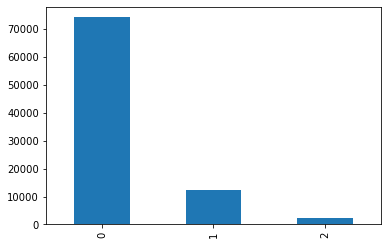

In [16]:
train['Crop_Damage'].value_counts().plot(kind='bar')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

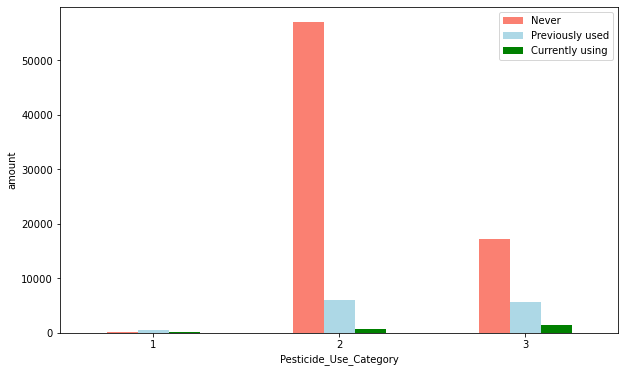

In [17]:
# Creating a plot of crosstab 
pd.crosstab(train.Pesticide_Use_Category ,train.Crop_Damage).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue','green'])
#plt.xlabel('0 =  , 1 = Heart disease')
plt.ylabel('amount')
plt.legend(['Never','Previously used','Currently using'])
plt.xticks(rotation=0)

In [18]:
# Correlation matrix
train.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.412904,0.299279,0.002304,0.202888
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.041679,-0.233394,0.002161,-0.016495
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.066420,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.326233,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.119778,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.412904,-0.041679,-0.066420,0.326233,0.119778,1.000000,-0.425763,0.004188,0.219621
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.425763,1.000000,0.000595,-0.133117
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004188,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.219621,-0.133117,-0.000184,1.000000


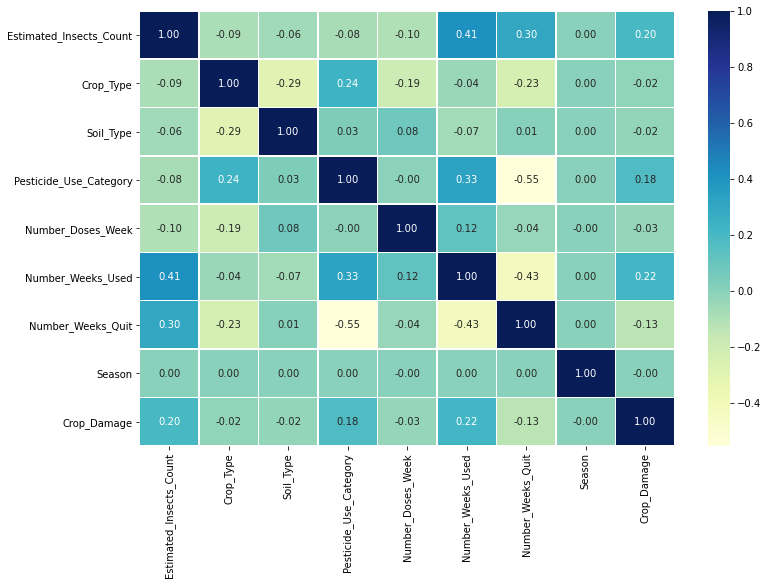

In [19]:
fig , ax = plt.subplots(figsize=(12,8))
sns.heatmap(train.corr(),annot = True,fmt='.2f',cmap='YlGnBu',linewidth=0.5)

### Modelling

In [20]:
# Splitting our data into X and y 
X = train.drop('Crop_Damage',axis=1)
y = train['Crop_Damage']

# Spliting the data into training and validition sets 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
len(X_train) ,len(y_train) ,len(X_val) , len(y_val)

(62200, 62200, 26658, 26658)

In [22]:
# Import the RandomForestClassifier from sklearn's ensemble module
# from sklearn.ensemble import RandomForestClassifier

# Instantiate an instance of RandomForestClassifier as clf
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Making predictions on test dataset 
y_preds = clf.predict(test)

In [26]:
clf.score(X_train,y_train)

0.9855627009646303

In [27]:
clf.score(X_val,y_val)

0.8232425538299948

In [62]:
# Import KNeighborsClassifier from sklearn's neighbors module
# from sklearn.neighbors import KNeighborsClassifier

# Instantiate an instance of KNeighborsClassifier as knn 
knn = KNeighborsClassifier(n_jobs= -1)
knn.fit(X_train,y_train)

# Making predictions on test dataset
y_preds = knn.predict(test)

In [63]:
# Generating acccuracy score 
knn.score(X_val,y_val)

0.821779578362968

In [64]:
knn.score(X_train,y_train)

0.8617041800643087

In [67]:
# Performing hypermater tuning on KNeighboursClassifier 
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

model = GridSearchCV(knn, param_grid=params, n_jobs=1)
model.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model.best_params_)

Best Hyper Parameters:
 {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 8, 'weights': 'uniform'}


In [68]:
knn = KNeighborsClassifier(n_jobs= -1,algorithm= 'ball_tree',leaf_size= 5,n_neighbors=8,weights = 'uniform')
knn.fit(X_train,y_train)
y_preds = knn.predict(test)
knn.score(X_val,y_val)

0.8315327481431465

In [34]:
# Performing hypermater tuning on RandomForestClassifier
n_estimators = [500,800,1500,5000]
max_features = ['auto','sqrt','log2']
max_depth = [10,20,30,40,50]
max_depth.append(None)
min_samples_split = [2,5,10,20]
min_samples_leaf = [1,2,5,10,15]

In [35]:
grid_param = {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf }

In [36]:
# Generating best hyperparameters with the help of RandomizedSearchCV 
clf = RandomForestClassifier(random_state=1)
clf_random = RandomizedSearchCV(estimator = clf,
                               param_distributions = grid_param,
                               n_iter=100,
                               cv=5,verbose = 2,random_state = 42,
                               n_jobs=-1)

In [37]:
clf_random.fit(X_train,y_train)
print(clf_random.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 61.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 130.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 186.8min finished


{'n_estimators': 1500, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 'log2', 'max_depth': 40}


In [75]:
# Fitting our model with the best hyperparameters generated by Random Search CV 
clf = RandomForestClassifier(random_state = 1,
                                  n_estimators = 400,
                                  max_depth = 40, 
                                  min_samples_split = 13, 
                                  min_samples_leaf = 13,
                                  max_features='log2') 
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, max_features='log2', min_samples_leaf=13,
                       min_samples_split=13, n_estimators=400, random_state=1)

In [38]:
clf = RandomForestClassifier(random_state = 1,
                                  n_estimators = 1500,
                                  max_depth = 40, 
                                  min_samples_split = 2, 
                                  min_samples_leaf = 15,
                                  max_features='log2') 
clf.fit(X_train, y_train) 

RandomForestClassifier(max_depth=40, max_features='log2', min_samples_leaf=15,
                       n_estimators=1500, random_state=1)

In [76]:
clf.score(X_val,y_val)

0.8435366494110585

In [77]:
clf.score(X_train,y_train)

0.8542604501607717

In [78]:
y_preds = clf.predict(test)

In [79]:
# Saving the models prediction
x = pd.DataFrame(test.index)
y = pd.DataFrame(y_preds)
y.to_csv('y.csv',index=False)
y[0].value_counts()

0    56863
1     2443
2        4
Name: 0, dtype: int64

In [82]:
# The final submission file which I have created manually 
final = pd.read_csv('final.csv')
final.head()

,ID,Crop_Damage
0,F00000002,1
1,F00000007,1
2,F00000011,1
3,F00000013,1
4,F00000014,1
